# Data Analytics - Coursework 1

## What is the Purpose of Credit Risk Analysis?
Credit risk analysis is a form of analysis performed by a credit analyst on potential borrowers to determine their ability to meet debt obligations. The main goal of credit analysis is to determine the creditworthiness of potential borrowers and their ability to honor their debt obligations.
If the borrower presents an acceptable level of default risk, the analyst can recommend the approval of the credit application at the agreed terms. The outcome of the credit risk analysis determines the risk rating that the borrower will be assigned and their ability to access credit.

When calculating the credit risk of a particular borrower, lenders consider various factors commonly referred to as the “5 Cs of Credit.” The factors include the borrower’s capacity to repay credit, character, capital, conditions, and collateral. The lender uses the factors to evaluate the characteristics of the borrower and conditions of the loan to estimate the probability of default and the subsequent risk of financial loss.

Credit analysts may use various financial analysis techniques, such as ratio analysis and trend analysis to obtain measurable numbers that quantify the credit loss. The techniques measure the risk of credit loss due to changes in the creditworthiness of borrowers.

In [958]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# liberary loading
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy import stats
import warnings
warnings.simplefilter('ignore', category=UserWarning)  # suppresses warning message from Seaborn

# command below ensures matplotlib output can be included in Notebook

%matplotlib inline

# Data Understanding

In [959]:
#Read CSV file and create pandas dataframe
df = pd.read_csv("German Credit Risk Data.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df_copy = df

In [960]:
df.head(10)

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
0,less than 0 DM,6,critical account/other credits existing (not a...,radio/television,1169,unknown/ no savings account,more than 7 years,4,male : single,none,...,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes,Good
1,between 0 to 200 DM,48,existing credits paid back duly till now,radio/television,5951,less than 100 DM,between 1 to 4 years,2,female : divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee / official,1,none,yes,Bad
2,no checking account,12,critical account/other credits existing (not a...,education,2096,less than 100 DM,between 4 to 7 years,2,male : single,none,...,real estate,49,none,own,1,unskilled - resident,2,none,yes,Good
3,less than 0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,less than 100 DM,between 4 to 7 years,2,male : single,gaurantor,...,building society savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,Good
4,less than 0 DM,24,delay in paying off in the past,car (new),4870,less than 100 DM,between 1 to 4 years,3,male : single,none,...,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Bad
5,no checking account,36,existing credits paid back duly till now,education,9055,unknown/ no savings account,between 1 to 4 years,2,male : single,none,...,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes,Good
6,no checking account,24,existing credits paid back duly till now,furniture/equipment,2835,between 500 to 1000 DM,more than 7 years,3,male : single,none,...,building society savings agreement/life insurance,53,none,own,1,skilled employee / official,1,none,yes,Good
7,between 0 to 200 DM,36,existing credits paid back duly till now,car (used),6948,less than 100 DM,between 1 to 4 years,2,male : single,none,...,"car or other, not in attribute 6",35,none,rent,1,management/self-employed/highly qualified empl...,1,"yes, registered under the customers name",yes,Good
8,no checking account,12,existing credits paid back duly till now,radio/television,3059,more than 1000 DM,between 4 to 7 years,2,male : divorced/separated,none,...,real estate,61,none,own,1,unskilled - resident,1,none,yes,Good
9,between 0 to 200 DM,30,critical account/other credits existing (not a...,car (new),5234,less than 100 DM,unemployed,4,male : married/widowed,none,...,"car or other, not in attribute 6",28,none,own,2,management/self-employed/highly qualified empl...,1,none,yes,Bad


In [961]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [962]:
df.nunique()

Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose                                                       9
Credit amount                                               921
Savings account/bonds                                         5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age in years                                                 53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

In [963]:
df.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


# Exploratory Data Analysis

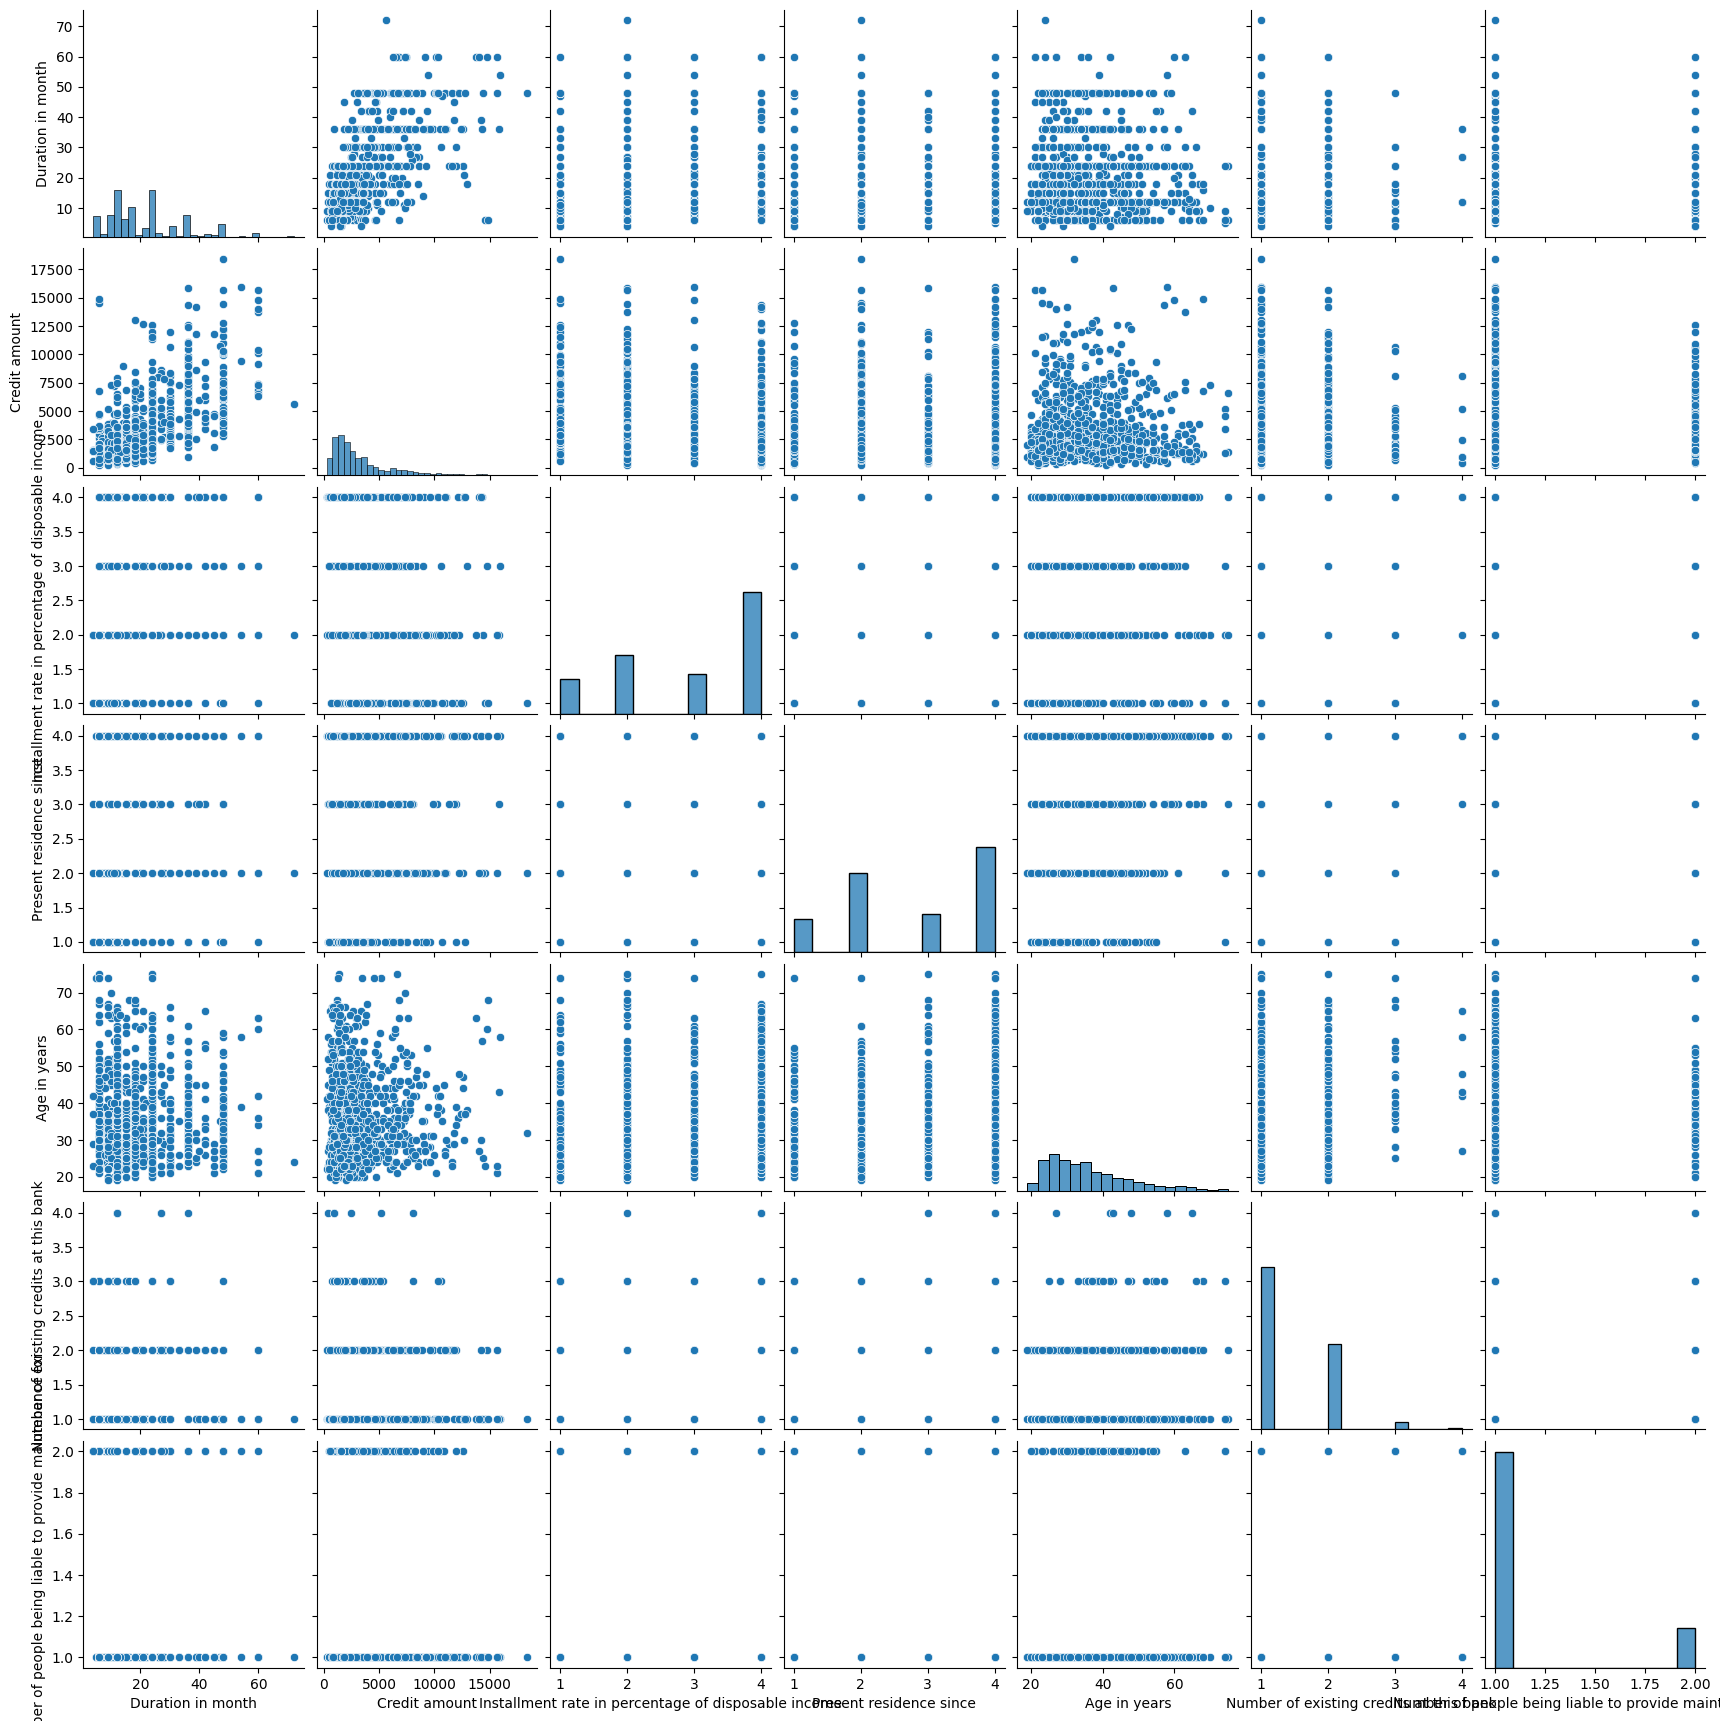

In [964]:
sns.pairplot(df)

## Analysis of Continuous Variables

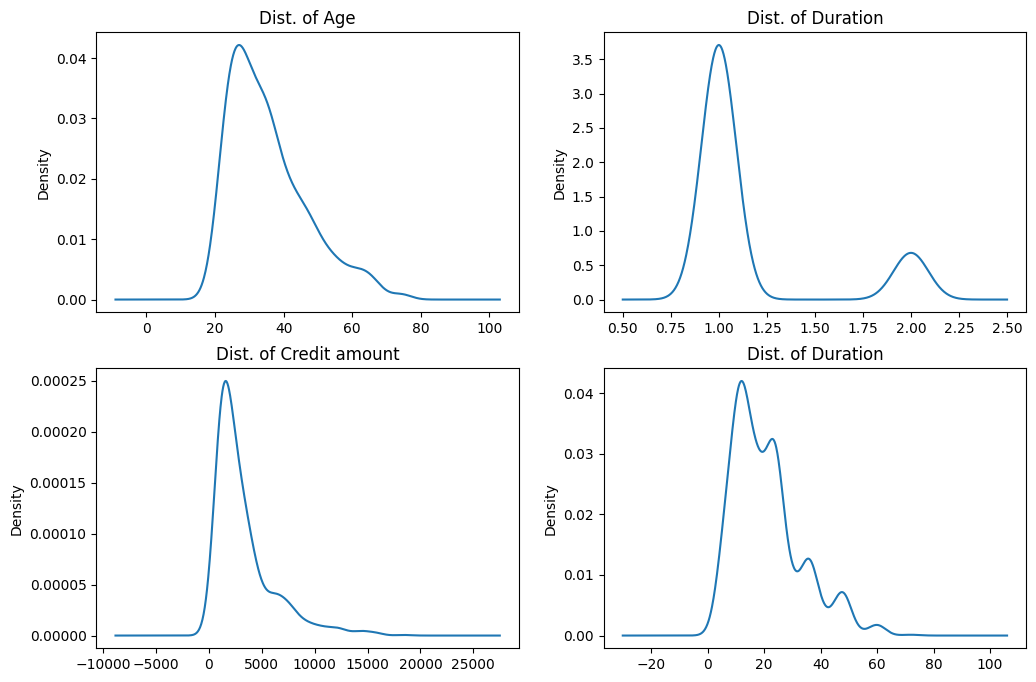

In [965]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df['Age in years'].plot(kind="density",ax=axes[0,0],title="Dist. of Age")
df['Credit amount'].plot(kind="density",ax=axes[1,0],title="Dist. of Credit amount")
df['Duration in month'].plot(kind="density",ax=axes[1,1],title="Dist. of Duration")
df['Number of people being liable to provide maintenance for'].plot(kind="density",ax=axes[0,1],title="Dist. of Duration")
plt.show()

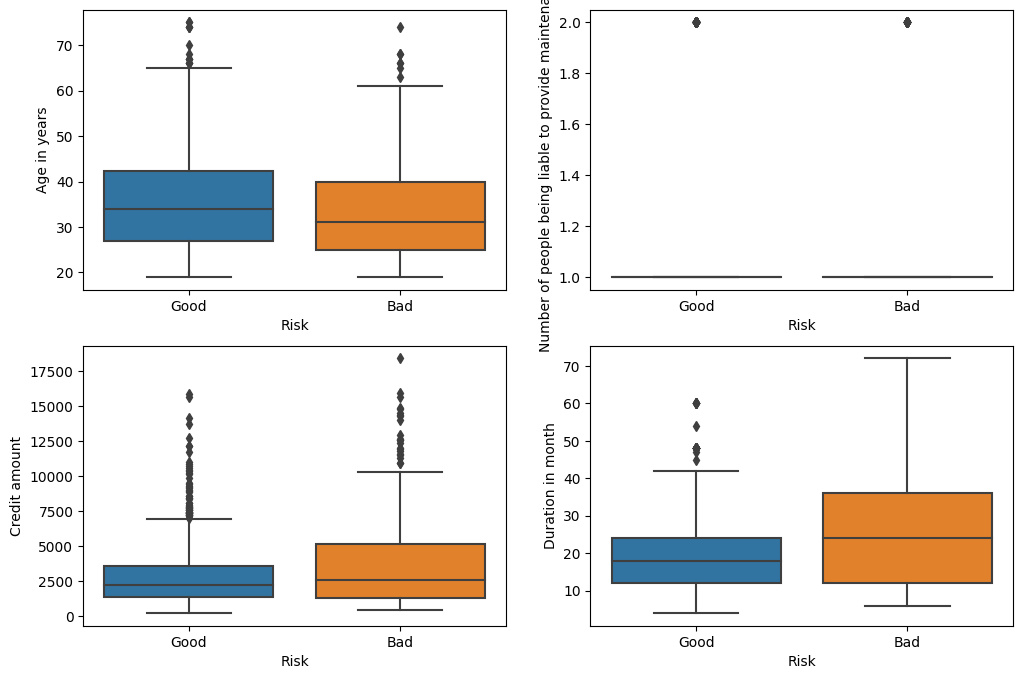

In [966]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
sns.boxplot(x="Risk",y="Age in years",data=df,ax=axes[0,0])
sns.boxplot(x="Risk",y="Credit amount",data=df,ax=axes[1,0])
sns.boxplot(x="Risk",y="Duration in month",data=df,ax=axes[1,1])
sns.boxplot(x="Risk",y="Number of people being liable to provide maintenance for",data=df_copy,ax=axes[0,1])
plt.show()

C:\Users\naman\AppData\Local\Temp\ipykernel_29860\4011089631.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr() # gives us the correlation values


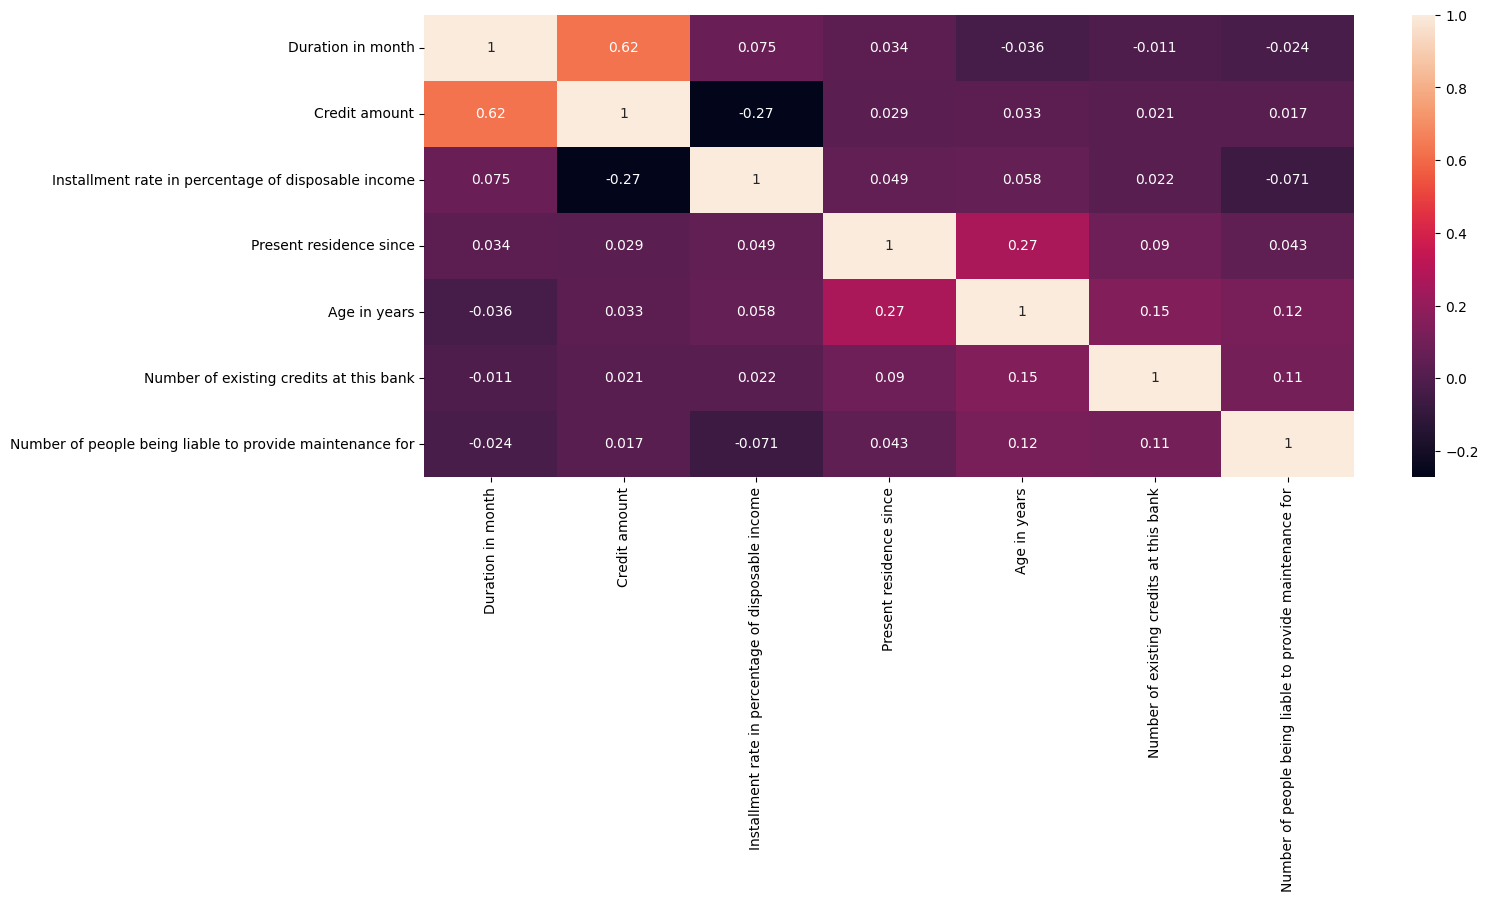

In [967]:
corr=df.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True)  # let's visualise the correlation matrix
plt.show()

## Analysis of Categorical variables

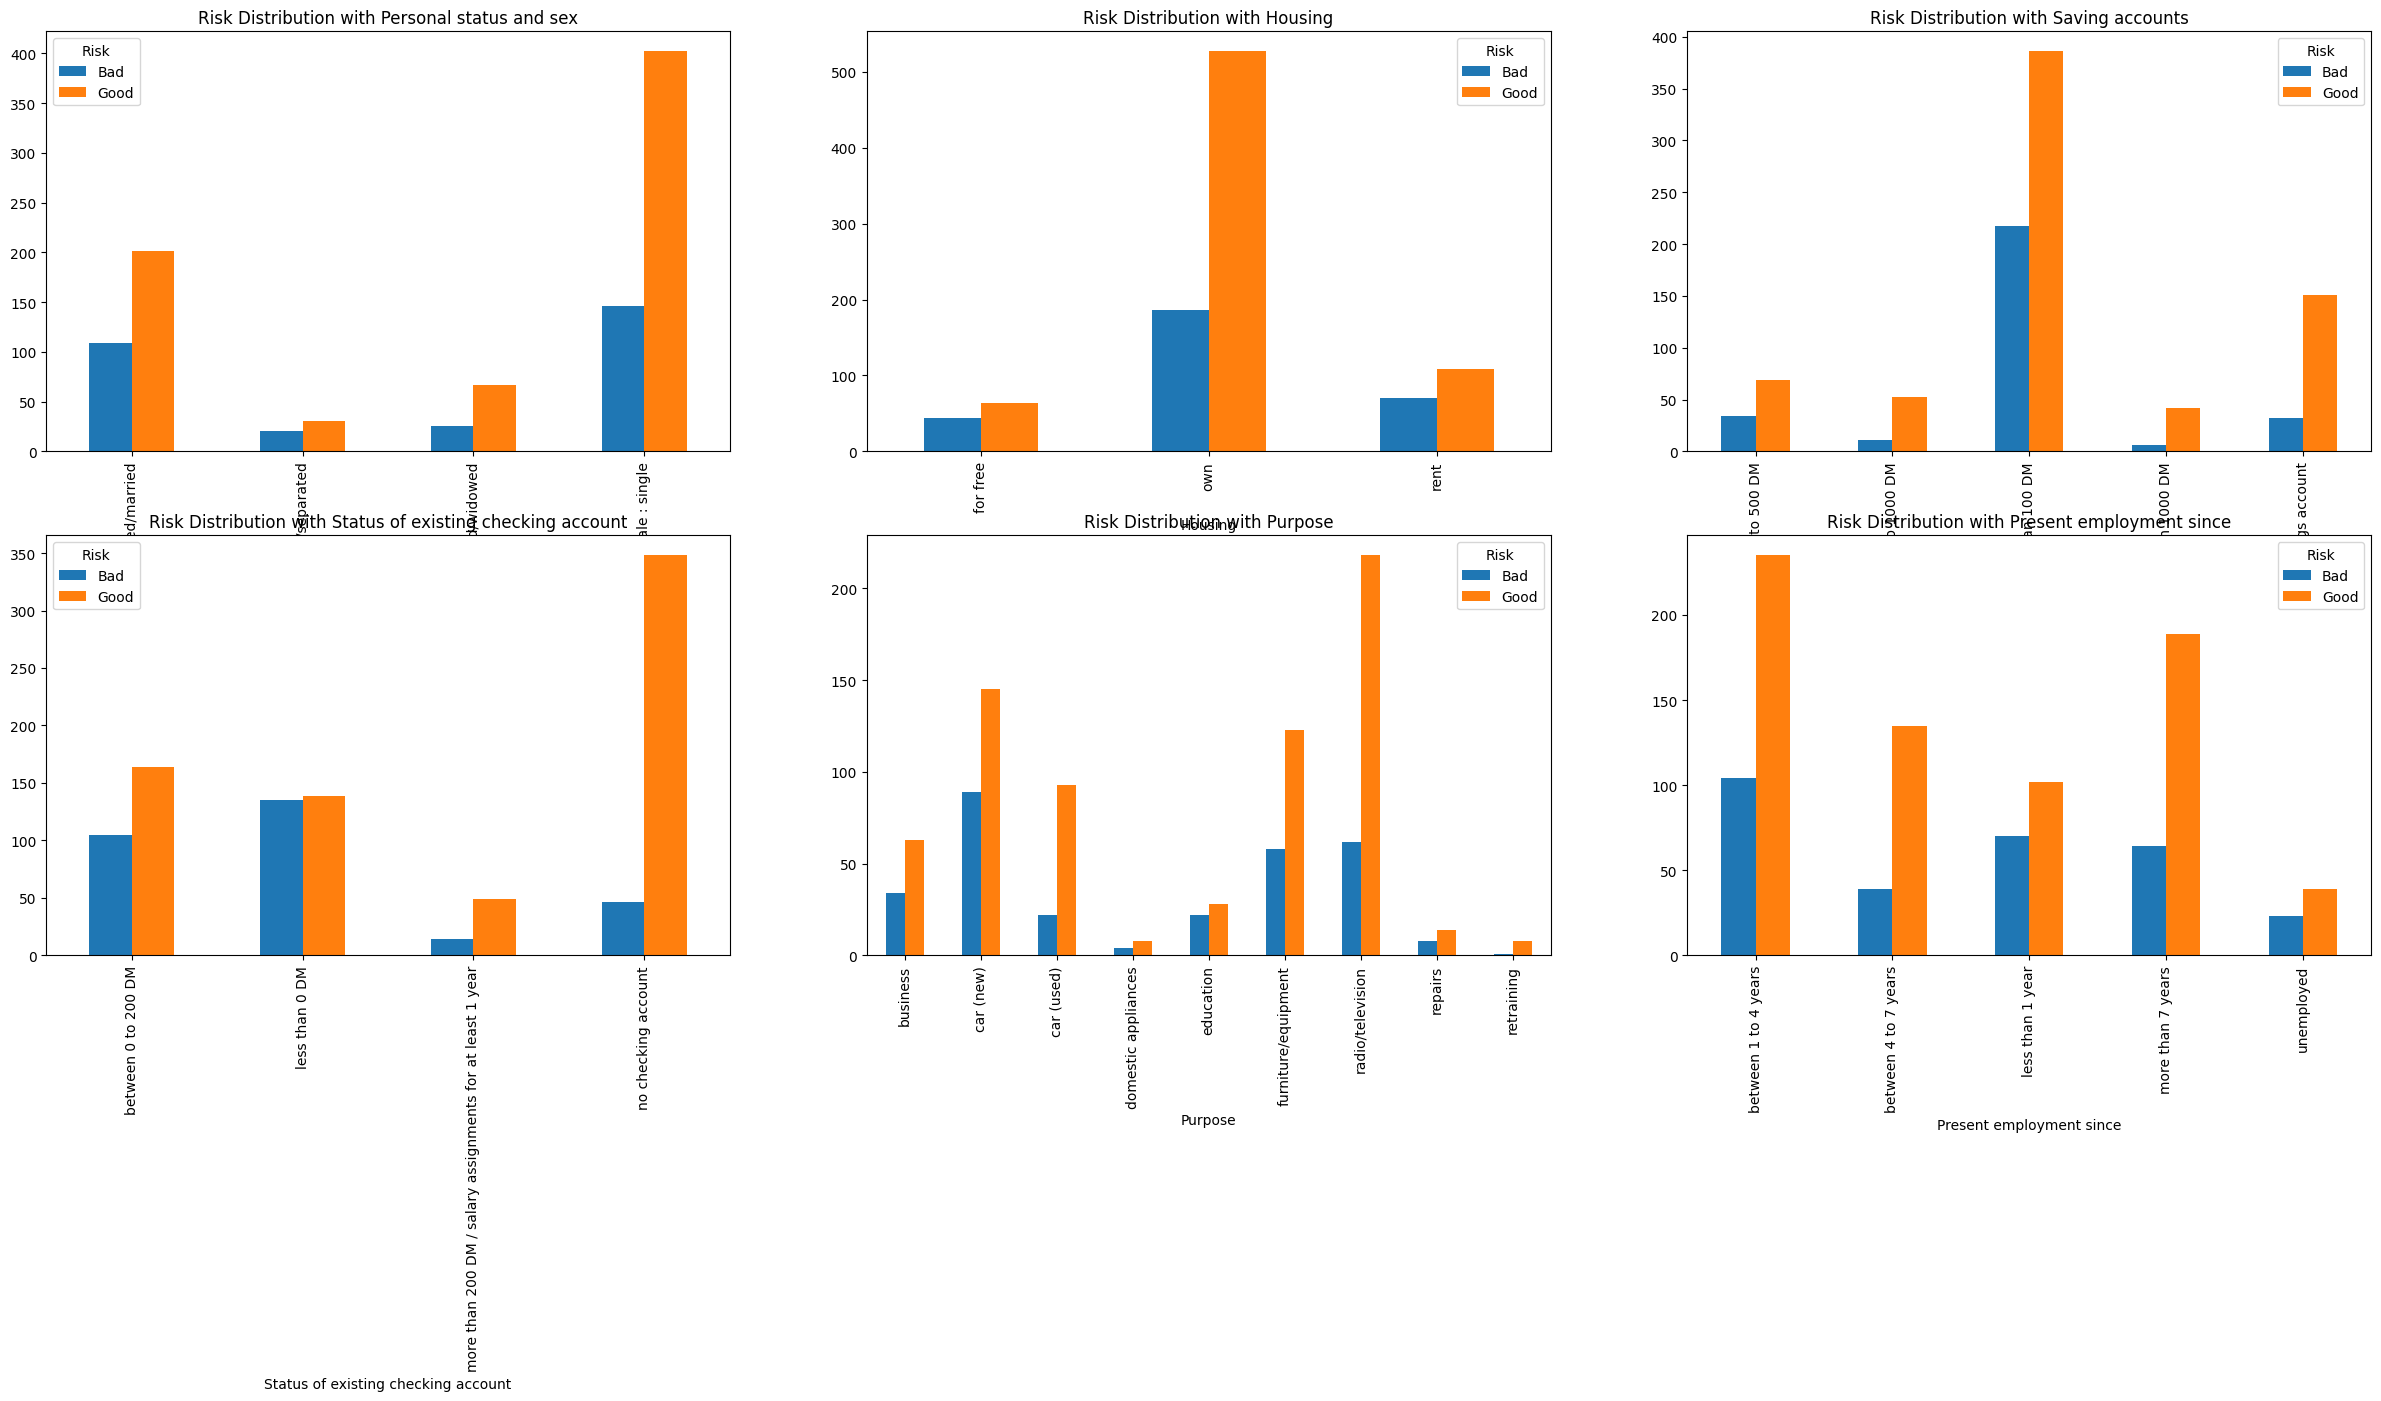

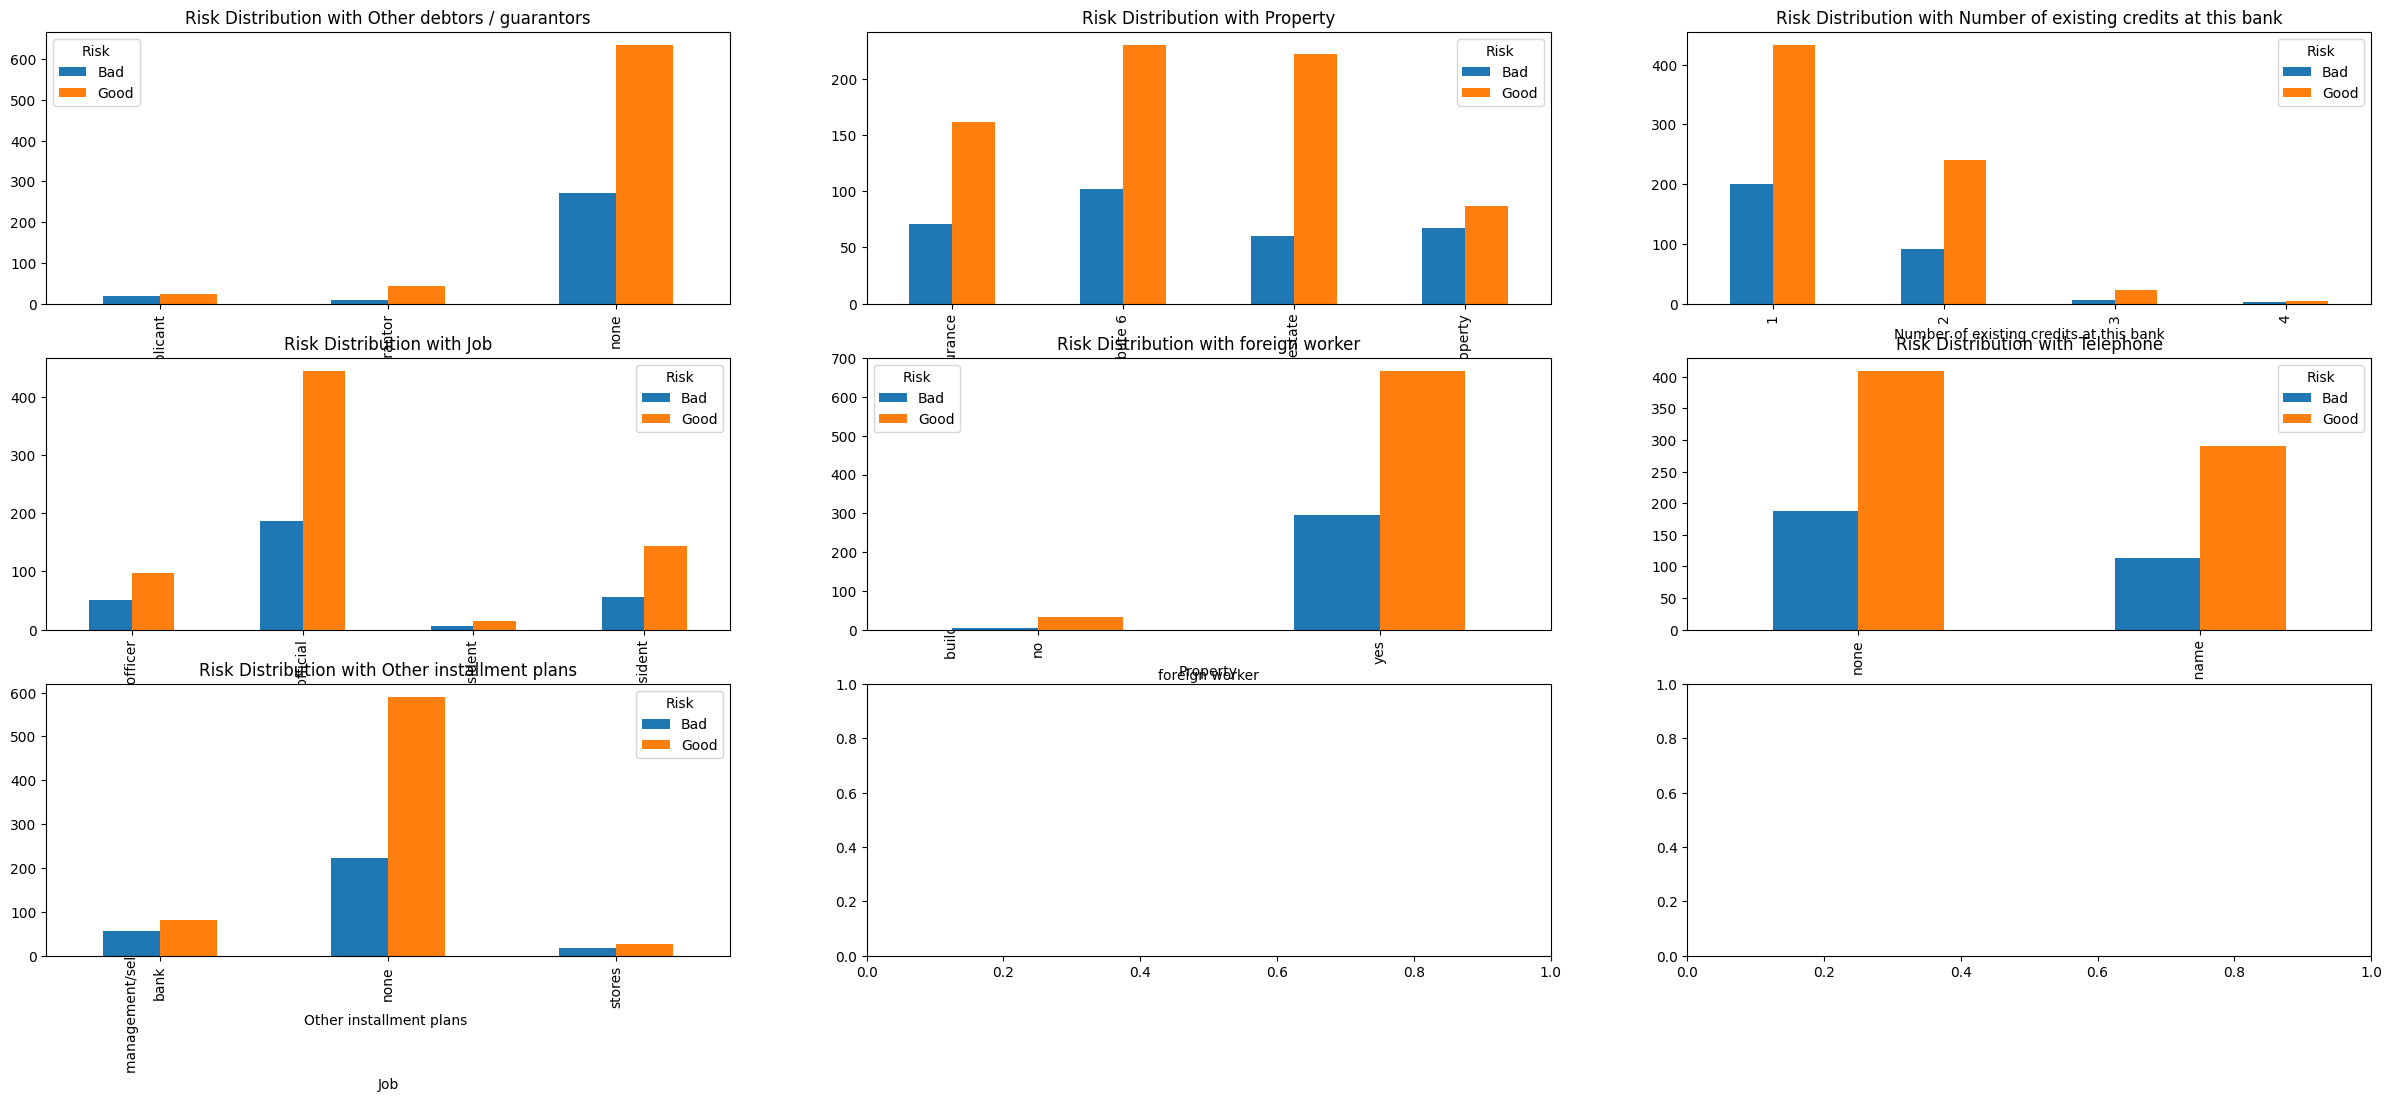

In [968]:
#Plot cross tabulation of features with Risk
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 12))
sex = pd.crosstab(df['Personal status and sex'],df['Risk'])
sex.plot(kind='bar',title="Risk Distribution with Personal status and sex",ax=axes[0,0])
housing = pd.crosstab(df['Housing'],df['Risk'])
housing.plot(kind='bar',title="Risk Distribution with Housing",ax=axes[0,1])
saving_acc = pd.crosstab(df['Savings account/bonds'],df['Risk'])
saving_acc.plot(kind='bar',title="Risk Distribution with Saving accounts",ax=axes[0,2])
checking_acc = pd.crosstab(df['Status of existing checking account'],df['Risk'])
checking_acc.plot(kind='bar',title="Risk Distribution with Status of existing checking account",ax=axes[1,0])
purpose = pd.crosstab(df['Purpose'],df['Risk'])
purpose.plot(kind='bar',title="Risk Distribution with Purpose",ax=axes[1,1])
pes = pd.crosstab(df['Present employment since'],df['Risk'])
pes.plot(kind='bar',title="Risk Distribution with Present employment since",ax=axes[1,2])
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 12))
odg = pd.crosstab(df['Other debtors / guarantors'],df['Risk'])
odg.plot(kind='bar',title="Risk Distribution with Other debtors / guarantors",ax=axes[0,0])
prop = pd.crosstab(df['Property'],df['Risk'])
prop.plot(kind='bar',title="Risk Distribution with Property",ax=axes[0,1])
existing_crd = pd.crosstab(df['Number of existing credits at this bank'],df['Risk'])
existing_crd.plot(kind='bar',title="Risk Distribution with Number of existing credits at this bank",ax=axes[0,2])
job = pd.crosstab(df['Job'],df['Risk'])
job.plot(kind='bar',title="Risk Distribution with Job",ax=axes[1,0])
foreign_worker = pd.crosstab(df['foreign worker'],df['Risk'])
foreign_worker.plot(kind='bar',title="Risk Distribution with foreign worker",ax=axes[1,1])
tel = pd.crosstab(df['Telephone'],df['Risk'])
tel.plot(kind='bar',title="Risk Distribution with Telephone",ax=axes[1,2])
oip = pd.crosstab(df['Other installment plans '],df['Risk'])
oip.plot(kind='bar',title="Risk Distribution with Other installment plans",ax=axes[2,0])
plt.show()


# Data Preprocessing

#### Treatment for Outliers

In [969]:
Q1=df_copy['Age in years'].quantile(0.25)
Q3=df_copy['Age in years'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df_copy = df_copy[df_copy['Age in years']< Upper_Whisker]
df_copy = df_copy[df_copy['Age in years']> Lower_Whisker]

threshold = 4
for i in range(threshold):
    Q1=df_copy['Credit amount'].quantile(0.25)
    Q3=df_copy['Credit amount'].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    Upper_Whisker = Q3+1.5*IQR
    df_copy = df_copy[df_copy['Credit amount']< Upper_Whisker]
    df_copy = df_copy[df_copy['Credit amount']> Lower_Whisker]

Q1=df_copy['Duration in month'].quantile(0.25)
Q3=df_copy['Duration in month'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
df_copy = df_copy[df_copy['Duration in month']< Upper_Whisker]
df_copy = df_copy[df_copy['Duration in month']> Lower_Whisker]

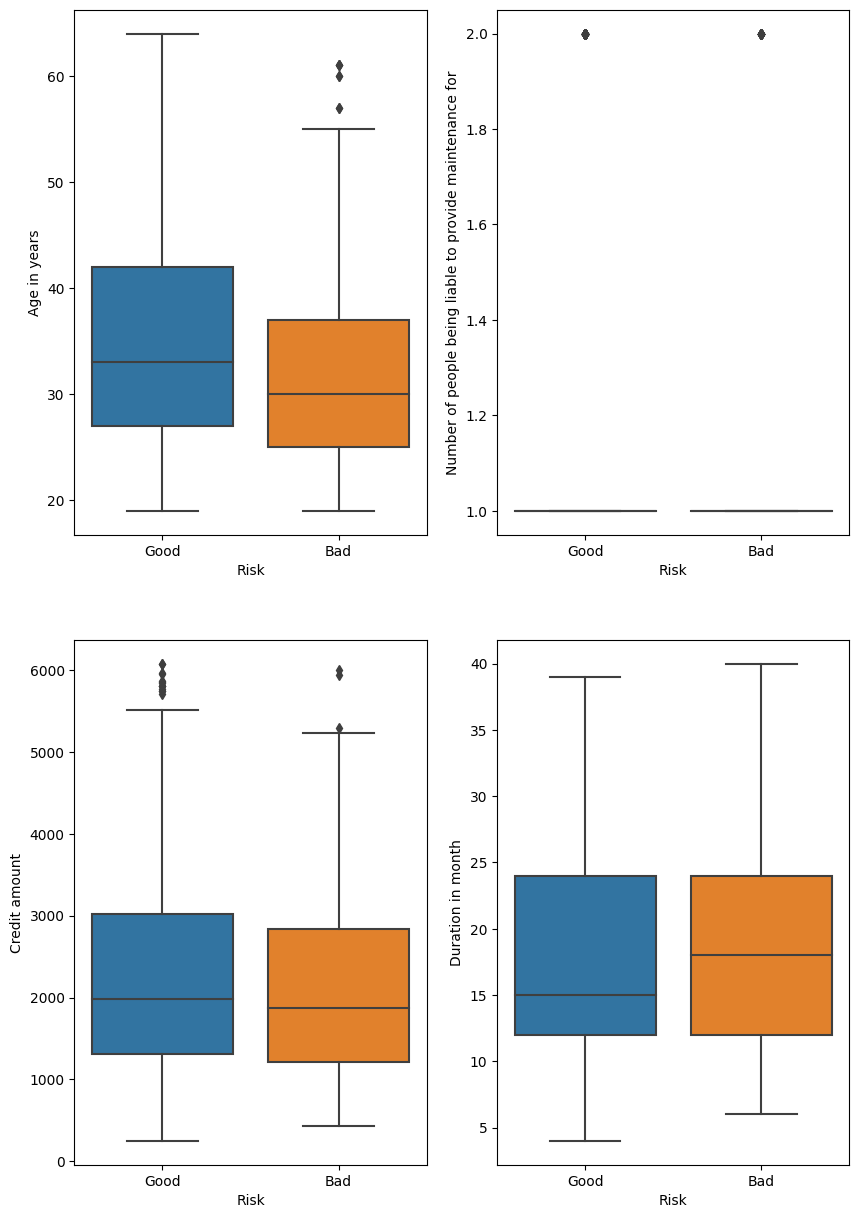

In [970]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 15))
sns.boxplot(x="Risk",y="Age in years",data=df_copy,ax=axes[0,0])
sns.boxplot(x="Risk",y="Credit amount",data=df_copy,ax=axes[1,0])
sns.boxplot(x="Risk",y="Duration in month",data=df_copy,ax=axes[1,1])
sns.boxplot(x="Risk",y="Number of people being liable to provide maintenance for",data=df_copy,ax=axes[0,1])
plt.show()

In [971]:
df_copy.isnull().value_counts()

Status of existing checking account  Duration in month  Credit history  Purpose  Credit amount  Savings account/bonds  Present employment since  Installment rate in percentage of disposable income  Personal status and sex  Other debtors / guarantors  Present residence since  Property  Age in years  Other installment plans   Housing  Number of existing credits at this bank  Job    Number of people being liable to provide maintenance for  Telephone  foreign worker  Risk 
False                                False              False           False    False          False                  False                     False                                                False                    False                       False                    False     False         False                     False    False                                    False  False                                                     False      False           False    807
dtype: int64

In [972]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 2 to 997
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       807 non-null    object
 1   Duration in month                                         807 non-null    int64 
 2   Credit history                                            807 non-null    object
 3   Purpose                                                   807 non-null    object
 4   Credit amount                                             807 non-null    int64 
 5   Savings account/bonds                                     807 non-null    object
 6   Present employment since                                  807 non-null    object
 7   Installment rate in percentage of disposable income       807 non-null    int64 
 8   Personal status and sex       

#### Categorical values converted to numerical values

In [973]:
df_copy['Present employment since'] = df_copy['Present employment since'].astype('category').cat.codes
df_copy['Purpose'] = df_copy['Purpose'].astype('category').cat.codes
df_copy['Credit history'] = df_copy['Purpose'].astype('category').cat.codes
df_copy['Status of existing checking account'] = df_copy['Status of existing checking account'].astype('category').cat.codes
df_copy['Savings account/bonds'] = df_copy['Savings account/bonds'].astype('category').cat.codes
df_copy['Housing'] = df_copy['Housing'].astype('category').cat.codes
df_copy['Personal status and sex'] = df_copy['Personal status and sex'].astype('category').cat.codes
df_copy['Other debtors / guarantors'] = df_copy['Other debtors / guarantors'].astype('category').cat.codes
df_copy['Property'] = df_copy['Property'].astype('category').cat.codes
df_copy['Other installment plans '] = df_copy['Other installment plans '].astype('category').cat.codes
df_copy['Job'] = df_copy['Job'].astype('category').cat.codes
df_copy['Telephone'] = df_copy['Telephone'].astype('category').cat.codes
df_copy['foreign worker'] = df_copy['foreign worker'].astype('category').cat.codes
df_copy['Risk'] = df_copy['Risk'].astype('category').cat.codes


#### Log tranformation

In [974]:
df_copy['Age in years']=np.log(df_copy['Age in years']+1)
df_copy['Credit amount']=np.log(df_copy['Credit amount']+1)
df_copy['Duration in month']=np.log(df_copy['Duration in month']+1)

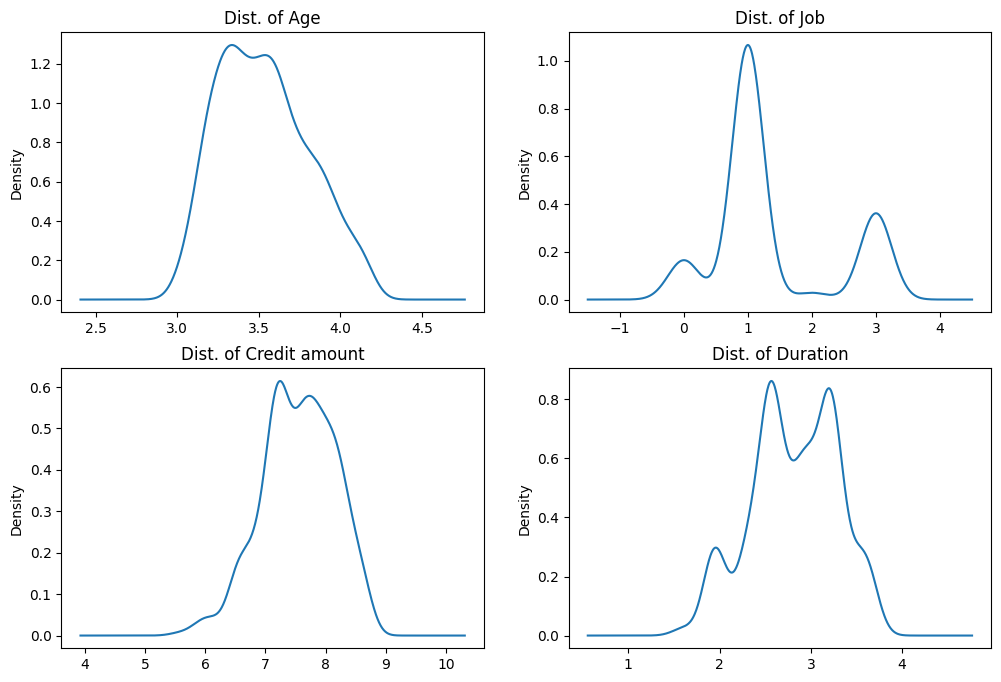

In [975]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_copy['Age in years'].plot(kind="density",ax=axes[0,0],title="Dist. of Age")
df_copy['Job'].plot(kind="density",ax=axes[0,1],title="Dist. of Job")
df_copy['Credit amount'].plot(kind="density",ax=axes[1,0],title="Dist. of Credit amount")
df_copy['Duration in month'].plot(kind="density",ax=axes[1,1],title="Dist. of Duration")
plt.show()

In [976]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 2 to 997
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       807 non-null    int8   
 1   Duration in month                                         807 non-null    float64
 2   Credit history                                            807 non-null    int8   
 3   Purpose                                                   807 non-null    int8   
 4   Credit amount                                             807 non-null    float64
 5   Savings account/bonds                                     807 non-null    int8   
 6   Present employment since                                  807 non-null    int8   
 7   Installment rate in percentage of disposable income       807 non-null    int64  
 8   Personal status and 

# Feature Engineering

In [977]:
df_train = df_copy
df_train.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Risk
2,3,2.564949,4,4,7.648263,2,1,2,3,2,...,2,3.912023,1,1,1,3,2,0,1,1
4,1,3.218876,1,1,8.491055,2,0,3,3,2,...,3,3.988984,1,0,2,1,2,0,1,0
6,3,3.218876,5,5,7.950150,1,3,3,3,2,...,0,3.988984,1,1,1,1,1,0,1,1
8,3,2.564949,6,6,8.026170,3,1,2,1,2,...,2,4.127134,1,1,1,3,1,0,1,1
9,0,3.433987,1,1,8.563122,2,4,4,2,2,...,1,3.367296,1,1,2,0,1,0,1,0


In [978]:
df_train.columns

Index(['Status of existing checking account', 'Duration in month',
       'Credit history', 'Purpose', 'Credit amount', 'Savings account/bonds',
       'Present employment since',
       'Installment rate in percentage of disposable income',
       'Personal status and sex', 'Other debtors / guarantors',
       'Present residence since', 'Property', 'Age in years',
       'Other installment plans ', 'Housing',
       'Number of existing credits at this bank', 'Job',
       'Number of people being liable to provide maintenance for', 'Telephone',
       'foreign worker', 'Risk'],
      dtype='object')

In [979]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 2 to 997
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       807 non-null    int8   
 1   Duration in month                                         807 non-null    float64
 2   Credit history                                            807 non-null    int8   
 3   Purpose                                                   807 non-null    int8   
 4   Credit amount                                             807 non-null    float64
 5   Savings account/bonds                                     807 non-null    int8   
 6   Present employment since                                  807 non-null    int8   
 7   Installment rate in percentage of disposable income       807 non-null    int64  
 8   Personal status and 

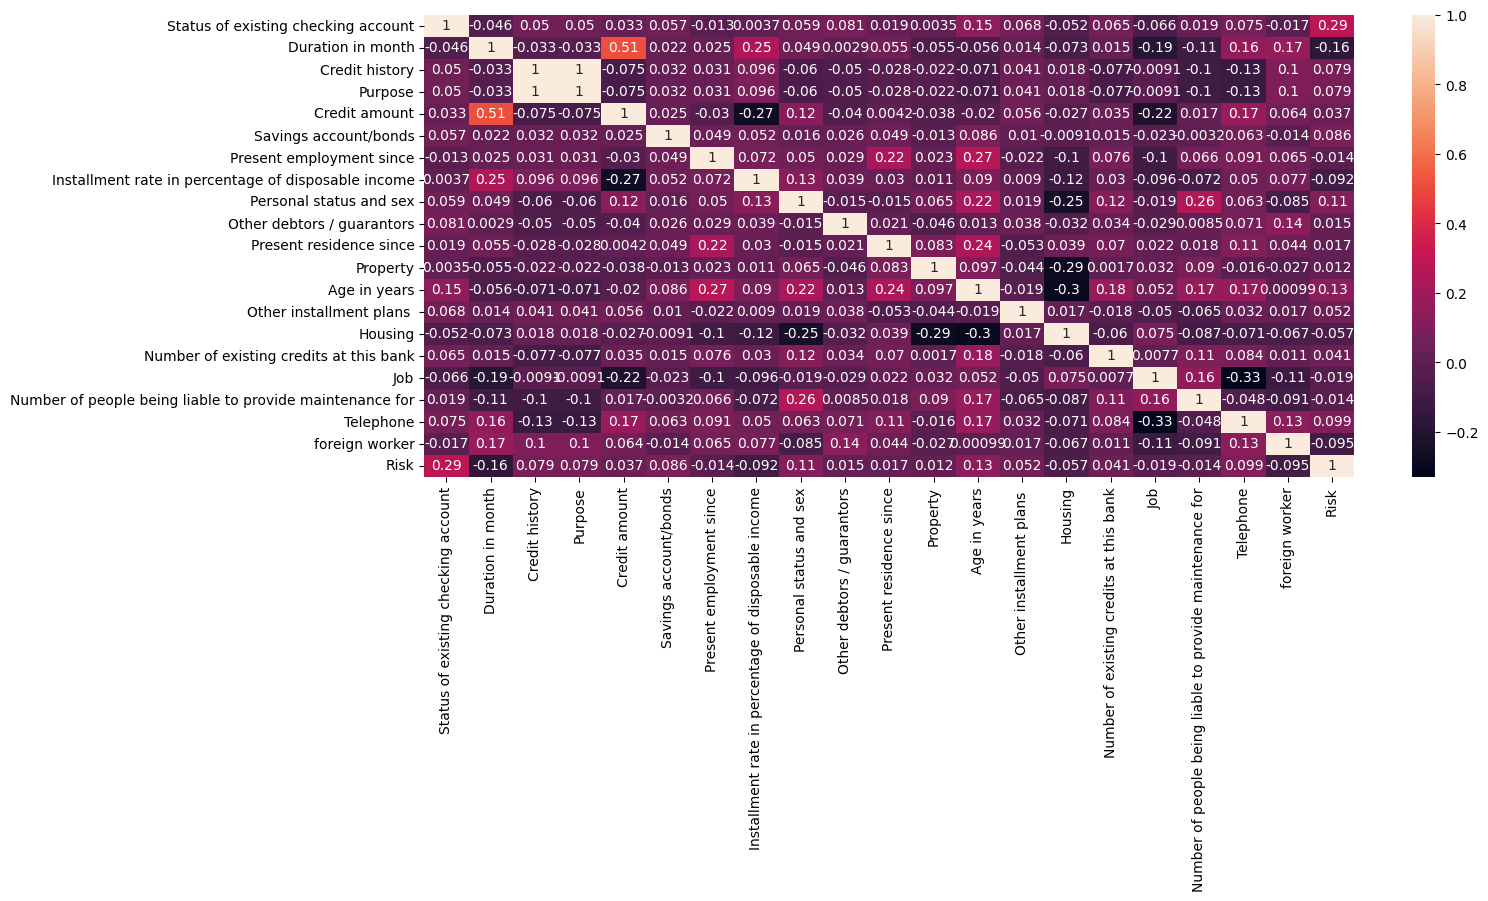

In [980]:
corr=df_train.corr() # gives us the correlation values
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot = True,)  # let's visualise the correlation matrix
plt.show()

In [981]:
X = df_train.drop(['Risk'],axis=1)
y = df_train['Risk']

##### Feature scoring methods

In [982]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif

# let's call the k-best method with Chi-squared score and pass X and y as inputs

chi2 = SelectKBest(score_func = chi2, k = 'all').fit(X,y)

# create Series with variable name as index, and scores as values, and sort lowest to highest ready for plotting

chi2_sorted = pd.Series(data=chi2.scores_, index=X.columns).sort_values()

# Repeat but with other scoring functions

ftest = SelectKBest(score_func = f_classif, k = 'all').fit(X,y)
ftest_sorted = pd.Series(data=ftest.scores_, index=X.columns).sort_values()

mitest = SelectKBest(score_func = mutual_info_classif, k = 'all').fit(X,y)
mitest_sorted = pd.Series(data=mitest.scores_, index=X.columns).sort_values()

In [983]:
from sklearn.ensemble import ExtraTreesClassifier # this is a method alternative to k-best

xtrees = ExtraTreesClassifier().fit(X, y)
xtrees_sorted = pd.Series(data=xtrees.feature_importances_, index=X.columns).sort_values()

from sklearn.feature_selection import mutual_info_classif

muinfo = mutual_info_classif(X,y)
muinfo_sorted = pd.Series(data=muinfo, index=X.columns).sort_values()

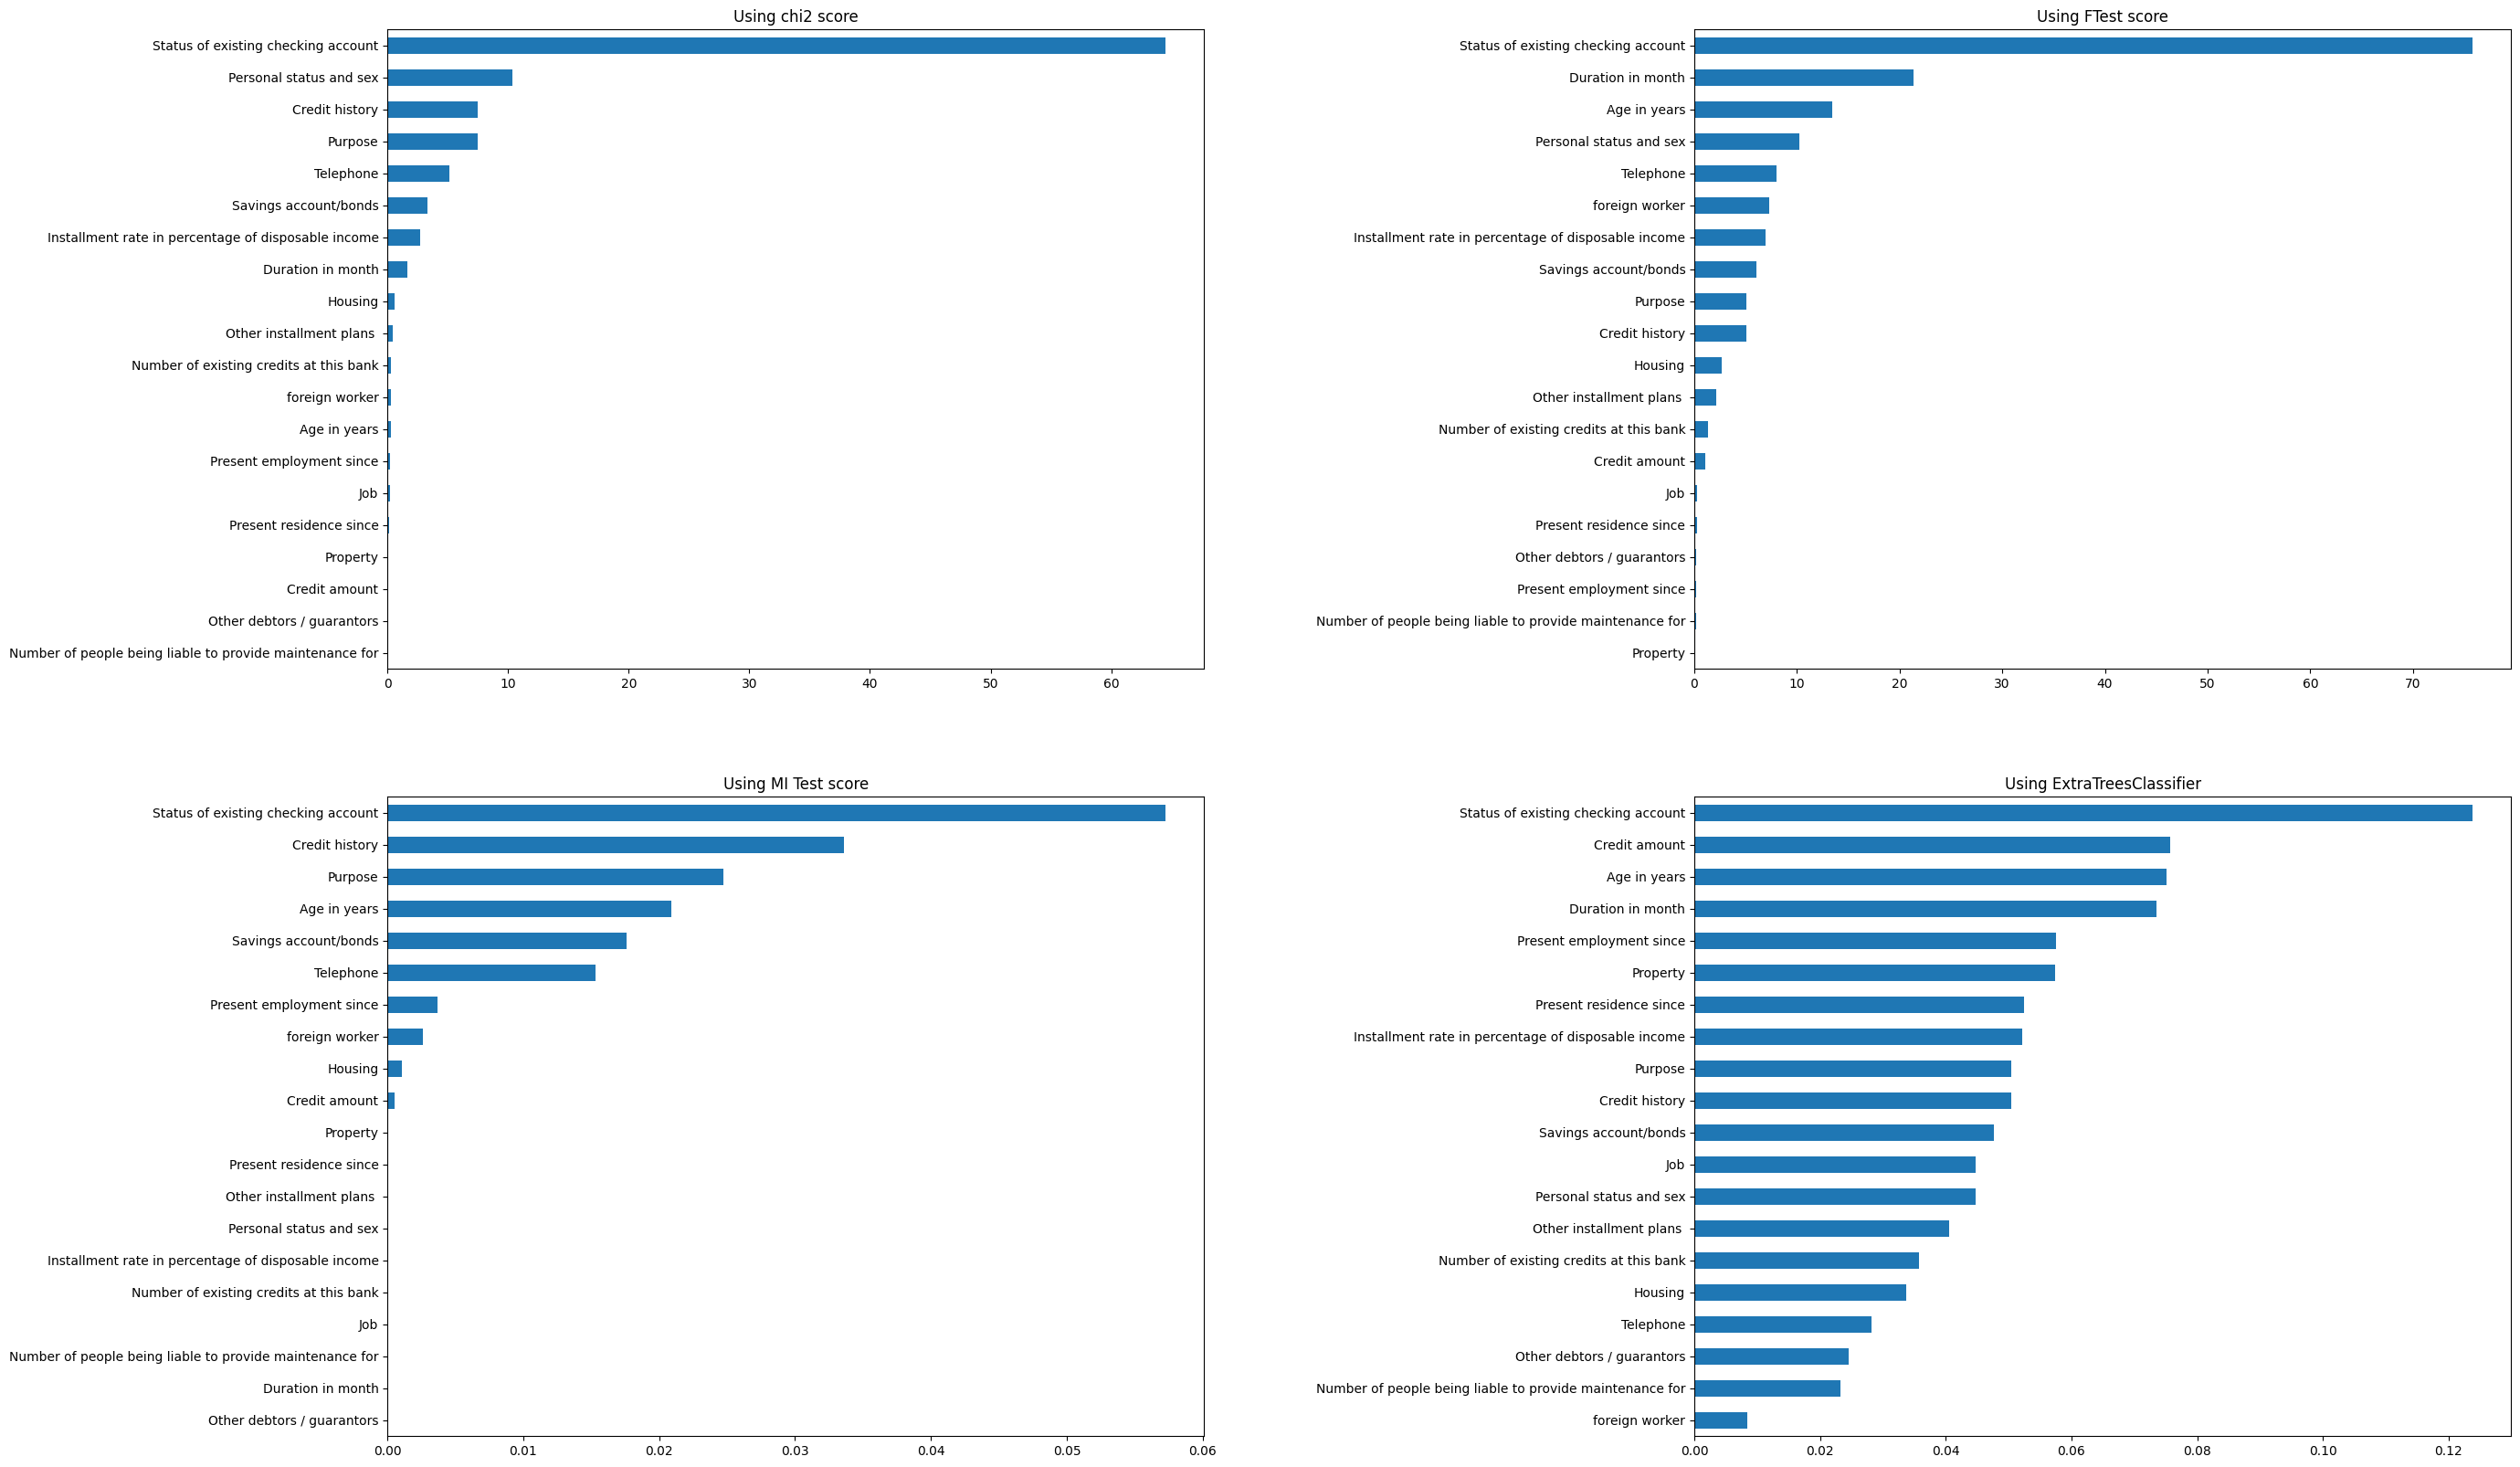

In [984]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(30, 20))
plt.subplots_adjust(wspace=0.6)
chi2_sorted.plot(kind='barh', ax=axes[0, 0], title='Using chi2 score')
ftest_sorted.plot(kind='barh', ax=axes[0, 1], title='Using FTest score')
xtrees_sorted.plot(kind='barh', ax=axes[1, 1], title='Using ExtraTreesClassifier')
mitest_sorted.plot(kind='barh', ax=axes[1, 0], title='Using MI Test score')
plt.show()

# Model Construction and Evaluation

In [985]:
X = X.drop(['Status of existing checking account'],axis=1)

In [986]:
Result = {}

In [987]:
def train_and_evaluate(model, X, y, name=""):
    """
        Train and evaluate a classification model on training data
        and produce accuracy metrics for a separate test set.
    """

    print('\nResults from algorithm {}:'.format(model))

    # Split data into train and test - we will use test for the final accuracy metrics
    # and not use it to train the model. This is good practice, particularly when you are
    # using cross-validation to select model parameters ... that way, the characteristics
    # of the test data don't leak into the model training
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Cross-validation accuracy gives an indication of variation in accuracy and a better
    # estimate for overall accuracy than just a single estimate. The mean cross-validation
    # accuracy is therefore a better guide when selecting model parameters or comparing models
    
    scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    print('Mean cross-validation accuracy is {:.3f} with SD {:.3f}'
          .format(np.mean(scores), np.std(scores)))
    
    # Fit model using all of the reserved training data ... look at training accuracy 
    # which we generally expect to be better than test accuracy

    learnt_model = model.fit(X_train, y_train)
    print('\nAccuracy on training data is {:.3f}\n'.format(model.score(X_train, y_train)))
    
    # User predict() to predict target values from test feature variables, and then
    # use functions to compute evaluation metrics relevant to binary outcome variable

    y_pred = model.predict(X_test)
    print('Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}'
          .format(accuracy_score(y_true=y_test, y_pred=y_pred),
                  f1_score(y_true=y_test, y_pred=y_pred),
                  precision_score(y_true=y_test, y_pred=y_pred),
                  recall_score(y_true=y_test, y_pred=y_pred)))
    
    # Draw out a confusion matrix
    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(5,5))
    ax = sns.heatmap(cm,annot=True, xticklabels=['Bad', 'Good'], cbar=False,
                     yticklabels=['Bad', 'Good'], square=True,
                     linewidths=8.0) # plots the confusion matrix
    ax.set_xlabel('Predicted Risk Status')
    ax.set_ylabel('Actual Risk Status')
    plt.show()

    Result[name] = {"Train" : model.score(X_train, y_train) ,"Test" : accuracy_score(y_true=y_test, y_pred=y_pred)}
    
    return learnt_model

##### Logitsic Regression


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.747 with SD 0.034

Accuracy on training data is 0.764

Test data metrics: accuracy=0.741, f1=0.837, precision=0.766, recall=0.923


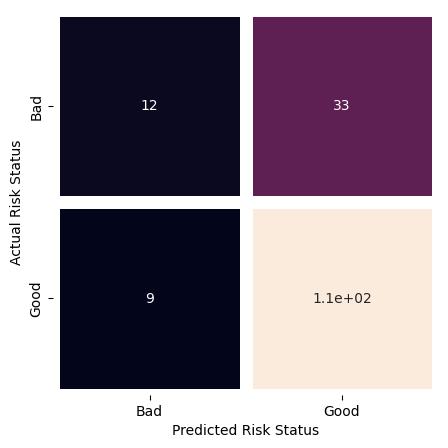

In [988]:
lr_model = LogisticRegression()
_ = train_and_evaluate(lr_model, X, y, "LogisticRegression")

##### K-Nearest Neighbour Classification


Results from algorithm KNeighborsClassifier():
Mean cross-validation accuracy is 0.709 with SD 0.048

Accuracy on training data is 0.802

Test data metrics: accuracy=0.716, f1=0.824, precision=0.745, recall=0.923


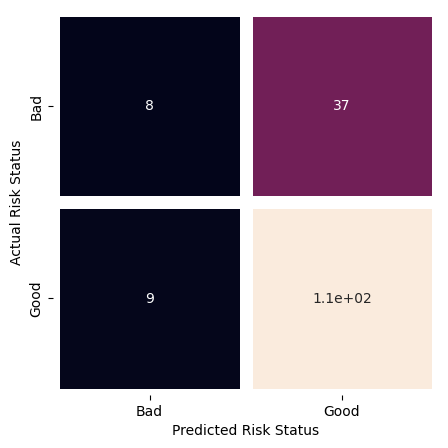

In [989]:
knn_model = KNeighborsClassifier()
_ = train_and_evaluate(knn_model, X, y,"KNeighborsClassifier")

##### Decision Tree Classification


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.647 with SD 0.047

Accuracy on training data is 1.000

Test data metrics: accuracy=0.593, f1=0.716, precision=0.722, recall=0.709


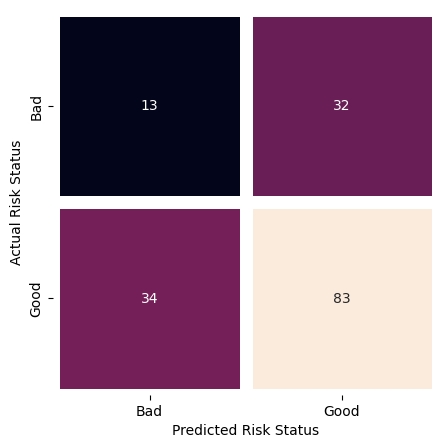

In [990]:
dtc_model = DecisionTreeClassifier()
learnt_model = train_and_evaluate(dtc_model, X, y,"DecisionTreeClassifier")

##### Random Forest Classification


Results from algorithm DecisionTreeClassifier():
Mean cross-validation accuracy is 0.644 with SD 0.058

Accuracy on training data is 1.000

Test data metrics: accuracy=0.611, f1=0.727, precision=0.737, recall=0.718


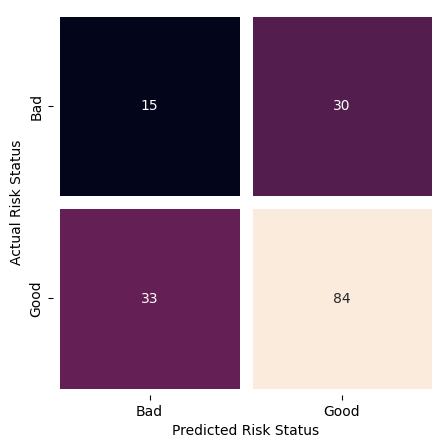

In [991]:
rf_model =RandomForestClassifier()
_ = train_and_evaluate(dtc_model, X, y,"RandomForestClassifier")

##### Support Vector Classification


Results from algorithm SVC(gamma='auto'):
Mean cross-validation accuracy is 0.744 with SD 0.011

Accuracy on training data is 0.753

Test data metrics: accuracy=0.716, f1=0.835, precision=0.720, recall=0.991


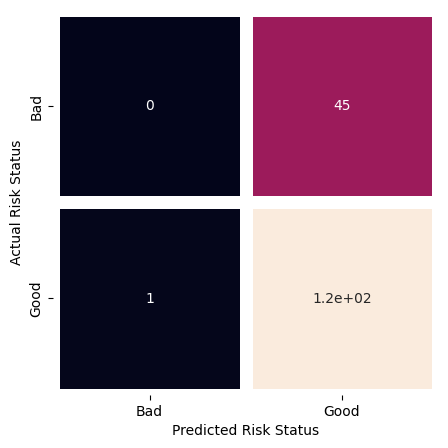

In [992]:
svc_model = SVC(gamma='auto')
_ = train_and_evaluate(svc_model, X, y,"Support Vector Classifier")

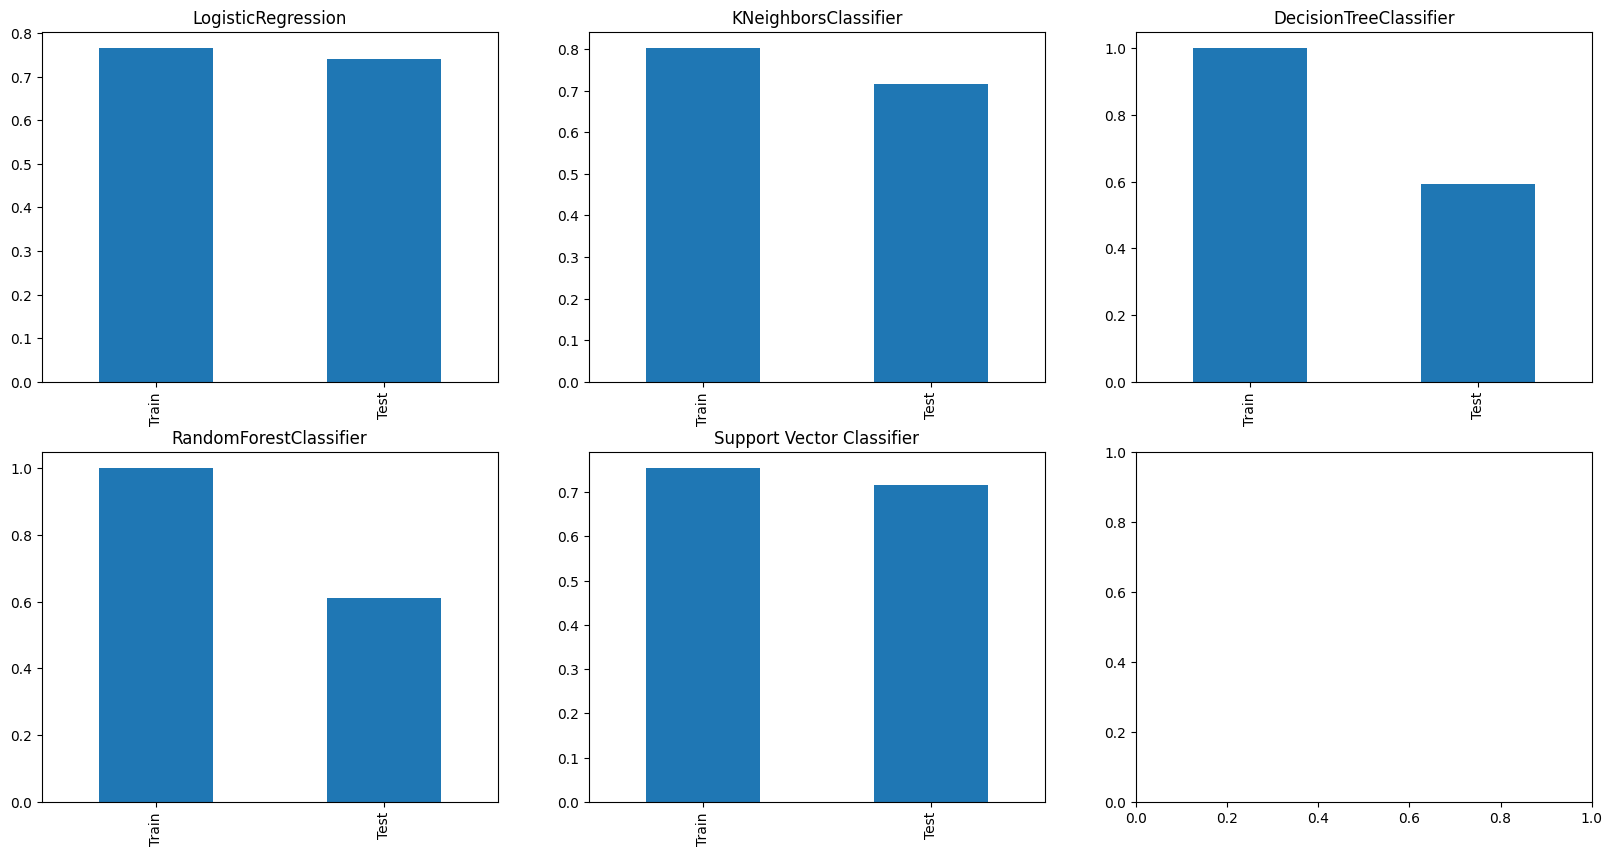

In [993]:
result_pd = pd.DataFrame(Result)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
result_pd['LogisticRegression'].plot(kind='bar',ax=axes[0,0],title="LogisticRegression")
result_pd['KNeighborsClassifier'].plot(kind='bar',ax=axes[0,1],title="KNeighborsClassifier")
result_pd['DecisionTreeClassifier'].plot(kind='bar',ax=axes[0,2],title="DecisionTreeClassifier")
result_pd['RandomForestClassifier'].plot(kind='bar',ax=axes[1,0],title="RandomForestClassifier")
result_pd['Support Vector Classifier'].plot(kind='bar',ax=axes[1,1],title="Support Vector Classifier")
plt.show()


# Feature Reduction using PCA

##### Used to corroborate feature selection in Feature Engineering

In [994]:
df_pca = df_train.copy()

In [995]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
cols = df_pca.columns
le = LabelEncoder()                       # initialise the necessary function taken from the LabelEncoder library
for col in cols:                          # iterate over all variables in cols
    df_pca[col] = le.fit_transform(df_pca[col])   # convert categorical values into integer values

X = df_pca.drop(['Risk'],axis=1)
y = df_pca['Risk']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)


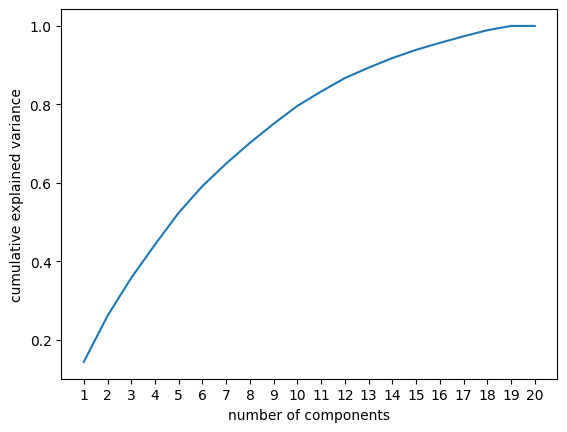

In [996]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20).fit(X)
plt.plot(range(1,21), np.cumsum(pca.explained_variance_ratio_)) #plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,21))  
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()